In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:

df= pd.read_csv('advertising.csv')

In [3]:
# Display the first five observations
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Extraction des colonnes X
XX = df[['TV', 'Radio', 'Newspaper']]

#X = df[['TV', 'Radio']]
# Extraction de la colonne y
yy = df['Sales']

In [5]:
XX


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
yy

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [7]:
# Drop the id and date columns
#df = df.drop(['Sales'], axis=1)

In [8]:
# Display the number of data observations
len(df)

200

In [9]:
print(len(df.columns))
print(len(XX.columns))

4
3


In [10]:
# Check the types of data
df.dtypes
#XX.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
# Display the number of null data observations
df.isnull().values.sum()

0

In [12]:
# Correlations of features with target variable
correlations = df.corr()
correlations['Sales']

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

In [13]:
# Correlations with target variable
cor_target = abs(correlations['Sales'])

# Display features with correlation < 0.2
#removed_features = cor_target[cor_target < 0.2]
#removed_features

In [14]:
# Remove features with correlation < 0.2
#df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long','sqft_lot15'], axis=1)

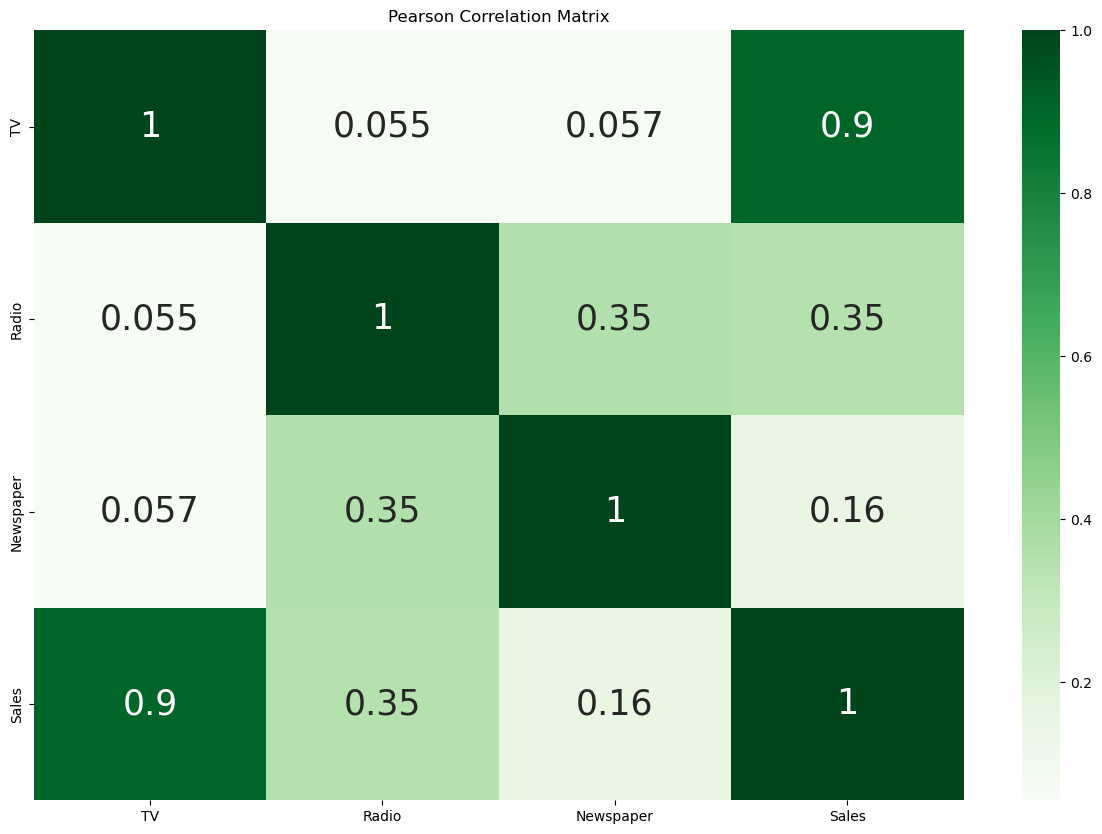

In [15]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(15, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 25})
plt.title('Pearson Correlation Matrix')
plt.show()

In [16]:
# Determine the highest intercorrelations
#highly_correlated_features = new_correlations[new_correlations > 0.75]
#highly_correlated_features.fillna('-')

In [17]:
# Remove features which are highly correlated with "sqft_living"
#df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long','sqft_lot15'], axis=1)


In [52]:
# Update features and store their length
features = XX.columns.tolist()
len_of_features = len(features)
len_of_features

# Display the first five observations
XX.head()
print(XX.shape)

(200, 3)


In [54]:
# Create X, y and theta
#XX = df.iloc[:, 1:]
print(' XX avant : ',XX.shape)
print('YY avant : ',yy.shape)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)


#print('y_train avant : ',y_train.shape)
# Création de la matrice X, inclut le Biais
# Normalize the features
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

#X

X = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
y = y_train.values.reshape((-1, 1))


print('x_train apres : ',X.shape)
print('y _train apres : ',y.shape)

X_train

 XX avant :  (200, 3)
YY avant :  (200,)
x_train apres :  (160, 4)
y _train apres :  (160, 1)


,TV,Radio,Newspaper
79,-0.402983,-1.025019,-0.336618
197,0.319604,-0.916949,-1.157804
38,-1.266534,0.258313,0.253455
24,-1.039097,-0.694054,-0.572648
122,0.876352,-1.383001,-0.705414
...,...,...,...
106,-1.480941,-0.802124,-0.012078
14,0.640623,0.677084,0.789438
92,0.801724,0.717610,1.428685
179,0.184563,-0.869668,-0.607069


In [38]:
#y_train=y_train.values.reshape(17290,1)
#print(y_train.shape)

In [39]:
#y = df.iloc[:, 0:1].values
np.random.seed(0)
theta = np.random.randn(X.shape[1], 1)
print(theta.shape)

(4, 1)


In [40]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

In [41]:
def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [42]:
cost_function(X, y, theta)

91.74091996597303

In [43]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [44]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [45]:
# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

#theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)


In [46]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
X = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

predictions = model(X, theta_final)

theta_final


array([[ 4.60164917],
       [ 1.49255211],
       [ 0.0901662 ],
       [15.3300599 ]])

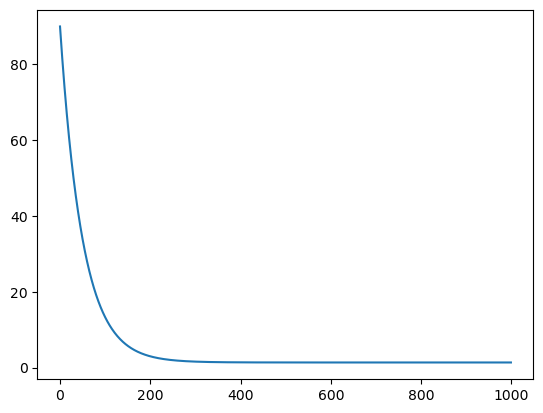

In [47]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

In [55]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [56]:
print(y_test.shape)
y_lst=y_test.values.reshape(y_test.shape[0],1)


print(y_lst.shape)
print(predictions)
coef_determination(y_lst, predictions)

(40,)
(40, 1)
[[17.48333383]
 [20.68884023]
 [23.64153395]
 [10.35836151]
 [21.90315565]
 [13.38366639]
 [21.30334372]
 [ 9.693849  ]
 [17.53459807]
 [17.1056219 ]
 [ 9.99436637]
 [ 9.46023444]
 [18.38289019]
 [ 9.22990583]
 [13.28270127]
 [15.41860442]
 [ 9.25457465]
 [18.25821894]
 [11.87314729]
 [20.66396907]
 [20.9525923 ]
 [13.37980439]
 [11.90550839]
 [22.43746185]
 [10.36336684]
 [ 8.93098   ]
 [21.07052506]
 [14.44344435]
 [11.60927944]
 [ 9.08946029]
 [16.34619646]
 [11.53868006]
 [21.05662038]
 [11.43983577]
 [21.58397707]
 [21.3572657 ]
 [13.07431463]
 [22.79057977]
 [13.33587502]
 [ 7.58171151]]


0.875298796818762

In [50]:
#str(predictions[4].round(2))

In [51]:
#str(y_lst[4].round(2))

In [34]:
#str(predictions[4].round(2)-y_lst[4].round(2))